# Problem 1: Importance of likelihood selection.
Consider an experimental setup where we can present an N-dimensional stimulus x ∈ RN that elicits a response in a recorded neural population. For one of these neurons, assume that we measure a response r(x) for a neuron with a tuning curve g that is defined as the number of spikes in 1 s after the presentation of the stimulus. A common model for the response distribution of this neuron is the Poisson model where the response r is distributed as P(r|x) = Poisson(e^⟨g,x⟩) where ⟨g,x⟩ denotes the inner product between two vectors.

#Part B
Now generate a single response draw for each of M different stimuli xm, m = 1,...,M, where M should be a parameter in your code that is easily adjustable. The response vector should now be an M dimensional vector r ∈RM with a corresponding matrix X = [x1,...,xM] containing all of your generated stimuli. Often in higher dimensional settings we linearize models, in this 1 case assuming that r ≈ Xg with added independent, identically distributed (i.i.d.) Gaussian noise. Set up a probabilistic relationship (likelihood) of r conditioned on g under a Gaussian noise assumption. Specifically, assume that r = Xg + ε where ε is a mean-zero, Gaussian noise vector with variance σ2I. Use the likelihood derived to set up a maximum likelihood inference of g given the responses and stimuli (hint: think least-squares). How close is the estimate of g to the real g?

Distance between estimated g and real g: 0.631652172456267


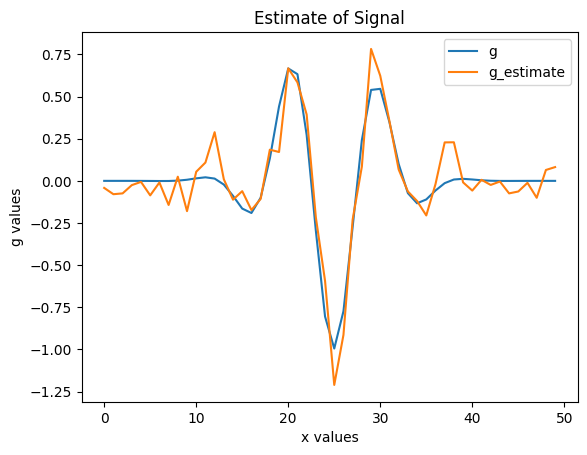

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import scipy
import numpy as np
import math

N = 50
M = 1000
cos_vals = np.linspace(0, N-1, N) / 10
g = scipy.signal.windows.gaussian(N, std=5.0) * np.cos(2 * math.pi * cos_vals)

# Generate samples
X = []
for i in range(M):
  X.append(2 * random.uniform(size=N))
X = np.array(X)
g = np.array(g)
inner_product = np.matmul(X, g)

# Set noise standard deviation
sigma = 2

# Generate the response vector r with Gaussian noise
noise = np.random.normal(0, sigma, M)
#r = random.poisson(np.exp(inner_product)) + noise
r = inner_product + noise

# Solve for gaussian estimate
X = np.linalg.pinv(X)
g_gaussian_estimate = np.matmul(X, r)

# Find Least Squares Distance
dist = sum(np.square(g - g_gaussian_estimate))
print("Distance between estimated g and real g: " + str(dist))

plt.figure()
plt.plot(g, label='g')
plt.plot(g_gaussian_estimate, label='g_estimate')
plt.xlabel('x values')
plt.ylabel('g values')
plt.title('Estimate of Signal')
plt.legend()
plt.show()